# ByT5 Model

In [1]:
# imports
from transformers import TrainingArguments, ByT5Tokenizer
from sklearn.metrics import roc_curve, auc
from utils import ByT5_model, ByT5_utils
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import os

In [2]:
load_dotenv()

# CONSTANTS
SAVE = True
VERSION = "v1"
RESULTS_PATH = os.getenv("RESULTS_PATH")
MODEL_PATH = os.getenv("MODEL_PATH")

In [3]:
# load data
# need to put in our data here. the data format expects the following format:
# url, label
# url is the whole url
# label is 0 for non-phishing, and 1 for phishing

train_data = pd.read_csv("datasets/train.csv")
val_data = pd.read_csv("datasets/validation.csv")
bench_data = pd.read_csv("datasets/benchmark.csv")

print(f"{len(train_data)} training samples")
print(f"{len(val_data)} validation samples")
print(f"{len(bench_data)} benchmark samples")

5208 training samples
651 validation samples
653 benchmark samples


In [4]:
# training data
train_count = train_data["label"].value_counts()
val_count = val_data["label"].value_counts()
phish_count = train_count[1] + val_count[1]
benign_count = train_count[0] + val_count[0]
print(f"Training and validation data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

# benchmark data
bench_count = bench_data["label"].value_counts()
phish_count = bench_count[1]
benign_count = bench_count[0]
print(f"Benchmark data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

Training and validation data value count:
phishing: 2007
benign: 3852
Benchmark data value count:
phishing: 224
benign: 429


In [5]:
# intialise model, tokenizer
model = ByT5_model.ByT5ForClassification(
    model_name='google/byt5-small',
    num_labels=2,
)
tokenizer = ByT5Tokenizer.from_pretrained('google/byt5-small')

In [6]:
# hyperparameters
BATCH_SIZE = 128
training_args = TrainingArguments(
    # saving results/checkpoints
    output_dir=RESULTS_PATH,
    save_safetensors=False,

    # evaluation
    eval_strategy="epoch",
    eval_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
    
    # saving
    save_strategy="epoch",
    save_steps=1,
    save_total_limit=3,

    # hyperparameters
    learning_rate=0.005,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=100,
    weight_decay=0.01,
)

In [7]:
# training loop
trainer = ByT5_utils.train_ByT5(
    model=model,
    tokenizer=tokenizer,
    train_data=train_data,
    val_data=val_data,
    training_args=training_args,
    patience=3,
    )

Preparing data...


Map:   0%|          | 0/5208 [00:00<?, ? examples/s]

Map:   0%|          | 0/651 [00:00<?, ? examples/s]

Data prepared.


  0%|          | 0/4100 [00:00<?, ?it/s]

Starting training


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.4431346356868744, 'eval_runtime': 1.4148, 'eval_samples_per_second': 460.138, 'eval_steps_per_second': 4.241, 'epoch': 1.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.34799665212631226, 'eval_runtime': 1.4034, 'eval_samples_per_second': 463.858, 'eval_steps_per_second': 4.275, 'epoch': 2.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.32111096382141113, 'eval_runtime': 1.4111, 'eval_samples_per_second': 461.358, 'eval_steps_per_second': 4.252, 'epoch': 3.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.35089951753616333, 'eval_runtime': 1.4189, 'eval_samples_per_second': 458.821, 'eval_steps_per_second': 4.229, 'epoch': 4.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.2908119857311249, 'eval_runtime': 1.4209, 'eval_samples_per_second': 458.169, 'eval_steps_per_second': 4.223, 'epoch': 5.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.2887691855430603, 'eval_runtime': 1.4259, 'eval_samples_per_second': 456.553, 'eval_steps_per_second': 4.208, 'epoch': 6.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.25673267245292664, 'eval_runtime': 1.3745, 'eval_samples_per_second': 473.62, 'eval_steps_per_second': 4.365, 'epoch': 7.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.26636409759521484, 'eval_runtime': 1.4067, 'eval_samples_per_second': 462.782, 'eval_steps_per_second': 4.265, 'epoch': 8.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.2500650882720947, 'eval_runtime': 1.4084, 'eval_samples_per_second': 462.239, 'eval_steps_per_second': 4.26, 'epoch': 9.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.24593056738376617, 'eval_runtime': 1.4195, 'eval_samples_per_second': 458.615, 'eval_steps_per_second': 4.227, 'epoch': 10.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.24454852938652039, 'eval_runtime': 1.4055, 'eval_samples_per_second': 463.19, 'eval_steps_per_second': 4.269, 'epoch': 11.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.2575210928916931, 'eval_runtime': 1.3831, 'eval_samples_per_second': 470.685, 'eval_steps_per_second': 4.338, 'epoch': 12.0}
{'loss': 0.3784, 'grad_norm': 0.25080981850624084, 'learning_rate': 0.004390243902439025, 'epoch': 12.2}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.25200048089027405, 'eval_runtime': 1.3874, 'eval_samples_per_second': 469.229, 'eval_steps_per_second': 4.325, 'epoch': 13.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.24161037802696228, 'eval_runtime': 1.4218, 'eval_samples_per_second': 457.865, 'eval_steps_per_second': 4.22, 'epoch': 14.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.22971853613853455, 'eval_runtime': 1.3845, 'eval_samples_per_second': 470.19, 'eval_steps_per_second': 4.334, 'epoch': 15.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.2344895899295807, 'eval_runtime': 1.3874, 'eval_samples_per_second': 469.224, 'eval_steps_per_second': 4.325, 'epoch': 16.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.23561492562294006, 'eval_runtime': 1.3863, 'eval_samples_per_second': 469.597, 'eval_steps_per_second': 4.328, 'epoch': 17.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.20965416729450226, 'eval_runtime': 1.417, 'eval_samples_per_second': 459.427, 'eval_steps_per_second': 4.234, 'epoch': 18.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.20711544156074524, 'eval_runtime': 1.3926, 'eval_samples_per_second': 467.479, 'eval_steps_per_second': 4.309, 'epoch': 19.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.2165616899728775, 'eval_runtime': 1.381, 'eval_samples_per_second': 471.391, 'eval_steps_per_second': 4.345, 'epoch': 20.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.18804967403411865, 'eval_runtime': 1.3862, 'eval_samples_per_second': 469.618, 'eval_steps_per_second': 4.328, 'epoch': 21.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.18096239864826202, 'eval_runtime': 1.3825, 'eval_samples_per_second': 470.889, 'eval_steps_per_second': 4.34, 'epoch': 22.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.19306470453739166, 'eval_runtime': 1.3926, 'eval_samples_per_second': 467.478, 'eval_steps_per_second': 4.309, 'epoch': 23.0}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.20274782180786133, 'eval_runtime': 1.39, 'eval_samples_per_second': 468.357, 'eval_steps_per_second': 4.317, 'epoch': 24.0}
{'loss': 0.3117, 'grad_norm': 0.14073626697063446, 'learning_rate': 0.003780487804878049, 'epoch': 24.39}


  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.19070561230182648, 'eval_runtime': 1.3951, 'eval_samples_per_second': 466.634, 'eval_steps_per_second': 4.301, 'epoch': 25.0}
{'train_runtime': 369.1761, 'train_samples_per_second': 1410.709, 'train_steps_per_second': 11.106, 'train_loss': 0.3435537491775141, 'epoch': 25.0}
Training ended


In [8]:
# saving model
if SAVE:
    torch.save(
        model.state_dict(),
        f"{MODEL_PATH}/byt5-model-{VERSION}.pth"
    )
    tokenizer.save_pretrained(f"{MODEL_PATH}/byt5-tokenizer-{VERSION}")

In [9]:
# load model
if SAVE:
    model = ByT5_model.ByT5ForClassification()
    model.load_state_dict(torch.load(f"{MODEL_PATH}/byt5-model-{VERSION}.pth"))
    tokenizer = ByT5Tokenizer.from_pretrained(f"{MODEL_PATH}/byt5-tokenizer-{VERSION}")

C:\Users\qkm20\AppData\Local\Temp\ipykernel_23796\3685560557.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"{MODEL_PATH}/byt5-model-{

In [10]:
# evaluate trained model
ByT5_utils.evaluate_ByT5(trainer)

  0%|          | 0/6 [00:00<?, ?it/s]

{'eval_loss': 0.18096239864826202,
 'eval_runtime': 1.5373,
 'eval_samples_per_second': 423.463,
 'eval_steps_per_second': 3.903,
 'epoch': 25.0}

In [11]:
# predict single url
ByT5_utils.predict_single_url(bench_data["url"][0], model, tokenizer)

(0, 0.003107503056526184)

In [12]:
# predict dataframe
y_true, predicted_classes, y_proba = ByT5_utils.predict_dataframe(
    bench_data,
    model,
    tokenizer,
)

Processing 653 samples
Done, processed 653 samples


In [13]:
accuracies = ByT5_utils.calculate_accuracy_at_thresholds(y_true, y_proba)
for threshold, accuracy in accuracies:
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}")

Threshold: 0.10, Accuracy: 0.80
Threshold: 0.20, Accuracy: 0.88
Threshold: 0.30, Accuracy: 0.91
Threshold: 0.40, Accuracy: 0.91
Threshold: 0.50, Accuracy: 0.92
Threshold: 0.60, Accuracy: 0.92
Threshold: 0.70, Accuracy: 0.90
Threshold: 0.80, Accuracy: 0.88
Threshold: 0.90, Accuracy: 0.86


In [14]:
# statistics
ByT5_utils.fpr_comparison(np.array(y_true), np.array(y_proba))

,0.010,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001,0.000
precision,97.014925,97.709924,97.709924,97.709924,98.058252,98.058252,98.765432,98.765432,100.000000,100.000000,100.000000
fpr,0.009324,0.006993,0.006993,0.006993,0.004662,0.004662,0.002331,0.002331,0.000000,0.000000,0.000000
specificity,99.067599,99.300699,99.300699,99.300699,99.533800,99.533800,99.766900,99.766900,100.000000,100.000000,100.000000
accuracy,84.992343,84.839204,84.839204,84.839204,80.857580,80.857580,77.794793,77.794793,71.516080,71.516080,71.516080
recall,58.035714,57.142857,57.142857,57.142857,45.089286,45.089286,35.714286,35.714286,16.964286,16.964286,16.964286
f1_score,72.625698,72.112676,72.112676,72.112676,61.773700,61.773700,52.459016,52.459016,29.007634,29.007634,29.007634
threshold,0.928402,0.938804,0.938804,0.938804,0.973996,0.973996,0.988035,0.988035,0.996685,0.996685,0.996685


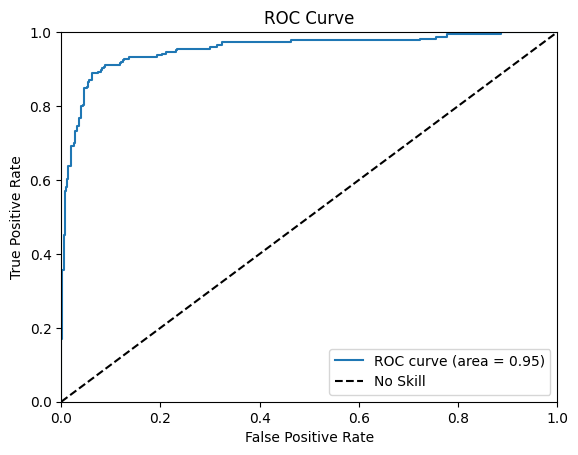

In [16]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()